<hr style="border:2px solid black"> 
 
 # Predicting the Rating/Score of Anime Using Data Scraped from MyAnimeList.coms
 


**Importing Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#nltk.download('example')

<span style='color:Purple'>
Data from MyAnimeList.

In [2]:
mal_df = pd.read_csv('/Users/aaronbrown/Documents/Classwork/DSC 630 - Predictive Analytics/Data/mal_anime.csv')

In [3]:
mal_data = mal_df
mal_data = mal_df[['title', 'episodes', 'type', 'favorites', 'score', 'members', 'studios']]
mal_data.head(3)

,title,episodes,type,favorites,score,members,studios
0,Fullmetal Alchemist: Brotherhood,64,TV,"218,277",9.10,"3,190,961",Bones
1,Steins;Gate,24,TV,"183,596",9.07,"2,452,142",White Fox
2,Bleach: Sennen Kessen-hen,13,TV,"18,421",9.06,"455,428",Pierrot


**Removing Missing Values**

In [4]:
mal_data.isnull().sum()

title           0
episodes        0
type            0
favorites       0
score        8968
members         0
studios         0
dtype: int64

In [5]:
mal_data.dropna(inplace=True)
mal_data.isnull().sum()

title        0
episodes     0
type         0
favorites    0
score        0
members      0
studios      0
dtype: int64

In [6]:
mal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15294 entries, 0 to 24261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      15294 non-null  object 
 1   episodes   15294 non-null  object 
 2   type       15294 non-null  object 
 3   favorites  15294 non-null  object 
 4   score      15294 non-null  float64
 5   members    15294 non-null  object 
 6   studios    15294 non-null  object 
dtypes: float64(1), object(6)
memory usage: 955.9+ KB


**Removing Punctuation.**

In [7]:
'Libraries needed for text cleaning functions.'
import string
import nltk

In [8]:
## "punctuation_be_gone" function removes punctuation and special characters from the text.

def punctuation_be_gone(text_only):
    for punctuation in string.punctuation:
            text_only = text_only.replace(punctuation, '') # <=replace with here
    return text_only

In [9]:
mal_data['favorites'] = mal_data['favorites'].apply(punctuation_be_gone)
mal_data['favorites'] = mal_data['favorites'].astype(int)

mal_data['members'] = mal_data['members'].apply(punctuation_be_gone)
mal_data['members'] = mal_data['members'].astype(int)
mal_data.head()

,title,episodes,type,favorites,score,members,studios
0,Fullmetal Alchemist: Brotherhood,64,TV,218277,9.10,3190961,Bones
1,Steins;Gate,24,TV,183596,9.07,2452142,White Fox
2,Bleach: Sennen Kessen-hen,13,TV,18421,9.06,455428,Pierrot
3,Gintama°,51,TV,16042,9.06,599235,Bandai Namco Pictures
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,TV,29397,9.05,832346,A-1 Pictures


**Removing Specific Element in Column.**

In [10]:
mal_data['episodes'].replace('Unknown', '11.599', inplace=True)
mal_data['episodes'] = mal_data['episodes'].astype(float)

In [11]:
mal_data = mal_data[mal_data.type != "Unknown"]

**Creating Dummy Variables for "type" - "type_DV".**

In [12]:
type_dict = dict(TV=1, OVA=2, Movie=3, Special=4, ONA=5, Music=6)

mal_data['type_DV'] = mal_data['type'].map(type_dict)
mal_data.tail(3)

,title,episodes,type,favorites,score,members,studios,type_DV
24259,Seikoujo: Haitoku no Biden Dorei,2.0,OVA,10,5.86,4130,Studio Jam,2
24260,Chikan Juunin-tai The Animation,5.0,OVA,7,5.86,2855,Sugar Boy,2
24261,Gibo,2.0,OVA,16,5.86,5535,Y.O.U.C,2


In [13]:
mal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15293 entries, 0 to 24261
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      15293 non-null  object 
 1   episodes   15293 non-null  float64
 2   type       15293 non-null  object 
 3   favorites  15293 non-null  int64  
 4   score      15293 non-null  float64
 5   members    15293 non-null  int64  
 6   studios    15293 non-null  object 
 7   type_DV    15293 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


**Generating visualizations to examine features and relationships.**

In [25]:
mal_data2 = mal_data[['episodes', 'type_DV', 'favorites', 'score', 'members']]
mal_data2.head()

,episodes,type_DV,favorites,score,members
0,64.0,1,218277,9.10,3190961
1,24.0,1,183596,9.07,2452142
2,13.0,1,18421,9.06,455428
3,51.0,1,16042,9.06,599235
4,13.0,1,29397,9.05,832346


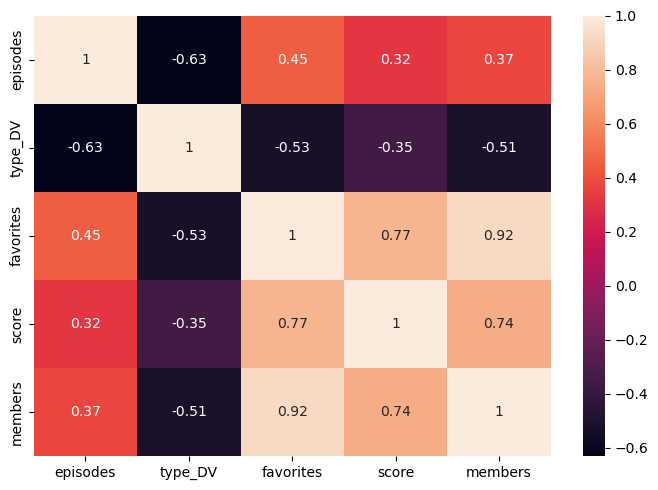

In [26]:
corr_matrix = mal_data2.corr(method = 'spearman')
fig, ax = plt.subplots(1, 1, figsize=(7,5), tight_layout = True) 
sns.heatmap(corr_matrix, annot = True)
plt.show()

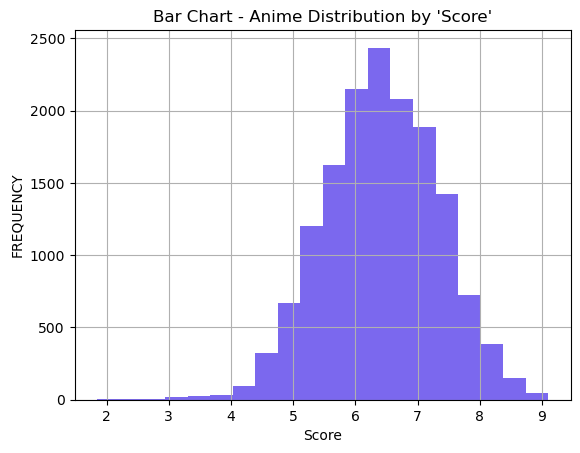

In [27]:
plt.hist(mal_data2['score'], bins=20, color='mediumslateblue')
plt.title("Bar Chart - Anime Distribution by 'Score'")
plt.xlabel("Score")
plt.ylabel("FREQUENCY")
plt.grid(True)
plt.show()

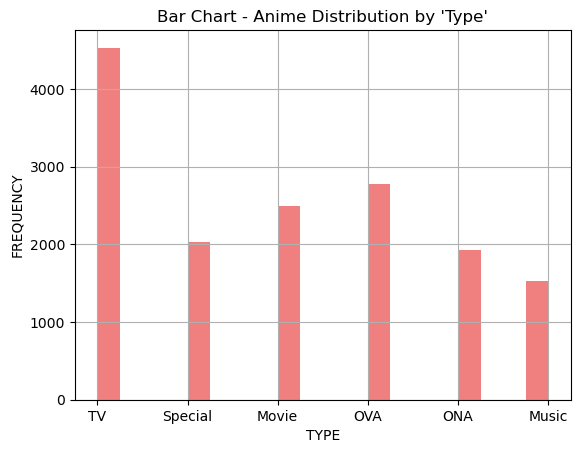

In [28]:
plt.hist(mal_data['type'], bins=20, color='lightcoral')
plt.title("Bar Chart - Anime Distribution by 'Type'")
plt.xlabel("TYPE")
plt.ylabel("FREQUENCY")
plt.grid(True)
plt.show()

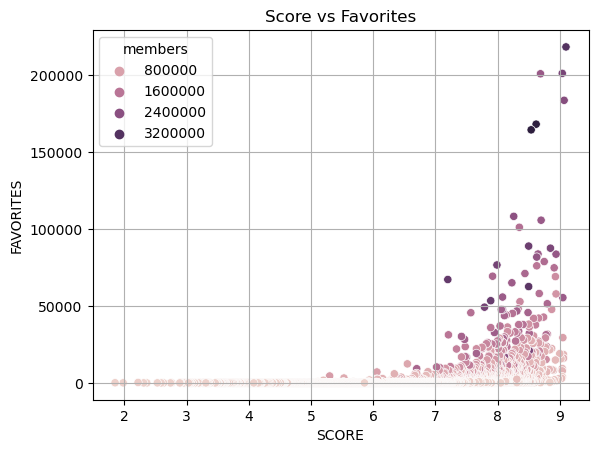

In [29]:
plt.figure(7)
plt.title("Score vs Favorites")
plt.xlabel("SCORE")
plt.ylabel("FAVORITES")
sns.scatterplot(x = mal_data['score'], y = mal_data['favorites'], hue = mal_data['members'])
sns.set_palette("PRGn")
plt.grid(True)

__Converting 'members' to Float Value.__

In [30]:
mal_data2 = mal_data2.explode('members')
mal_data2['members'] = mal_data2['members'].astype('float')

[Text(0.5, 1.0, 'Boxplot - Type x Score')]

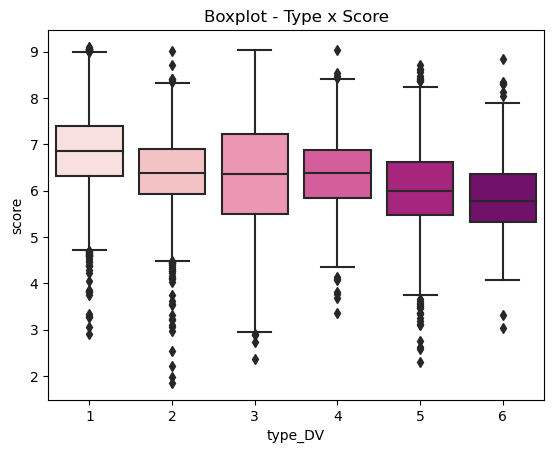

In [31]:
sns.boxplot (y = 'score', x = 'type_DV', data = mal_data2, palette='RdPu').set(title = 'Boxplot - Type x Score')

### Model Building - Linear Regression

__Describing Data.__

In [33]:
mal_data2.describe()

,episodes,type_DV,favorites,score,members
count,15293.000000,15293.000000,15293.000000,15293.000000,1.529300e+04
mean,11.598634,2.909697,706.077225,6.417142,6.029173e+04
std,48.792904,1.701085,5563.185671,0.919550,1.978039e+05
min,1.000000,1.000000,0.000000,1.850000,1.600000e+02
25%,1.000000,1.000000,1.000000,5.800000,1.138000e+03
50%,2.000000,3.000000,8.000000,6.420000,5.273000e+03
75%,12.000000,4.000000,66.000000,7.090000,2.898100e+04
max,3057.000000,6.000000,218277.000000,9.100000,3.762148e+06


**Splitting the data into a training and test set, where 'score' is the target.**

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
target = mal_data2.score
features = mal_data2.drop('score',axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target
                                                            , test_size=0.25, random_state=42)

print("shape of - features_train", x_train.shape)
print("shape of - target_train", y_train.shape)
print("shape of - features_test", x_test.shape)
print("shape of - target_test", y_test.shape)

shape of - features_train (11469, 4)
shape of - target_train (11469,)
shape of - features_test (3824, 4)
shape of - target_test (3824,)


**Using Linear Regression model to generate 'score' predictions.**

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linreg_model = LinearRegression()

linreg_model.fit(x_train, y_train)

LinearRegression()

In [38]:
score_predictions = linreg_model.predict(x_test)
score_predictions

array([6.39154534, 6.60276127, 6.35411345, ..., 5.91440097, 6.42710106,
       7.08204085])

**Calculation of RMSE to determine the performance for the regression model.**

In [39]:
from sklearn import metrics

In [40]:
RMSE = (metrics.mean_squared_error(y_test, score_predictions, squared=False))
print('Root Mean Squared Error (RMSE): %.4f' % RMSE)

Root Mean Squared Error (RMSE): 0.8209


__Model Comparison.__

__Fitting the Gradient Boosting Algorithm to the data.__

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)
GradientBoostingRegressor(random_state=0)
reg.predict(x_test)
reg.score(x_test, y_test)

0.6196390501539417

 <hr style="border:2px solid black"> 

## References

*__Choosing Colormaps in Matplotlib:__*

https://matplotlib.org/stable/tutorials/colors/colormaps.html

*__List of named colors in matplotlib:__*

https://matplotlib.org/stable/gallery/color/named_colors.html

*__Seaborn Styling, Color:__*
    
https://www.codecademy.com/article/seaborn-design-ii